## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import urllib
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False 

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

In [2]:
fd = pd.read_csv('fundamentals.csv')
se = pd.read_csv('securities.csv')
se = se.rename(columns={'Ticker symbol':'Ticker Symbol'})

In [3]:
fd1 = fd.query('`For Year` == 2015.0')
df = pd.merge(fd1, se, how = 'inner',on = 'Ticker Symbol')
df

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,For Year,Earnings Per Share,Estimated Shares Outstanding,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,3,AAL,2015-12-31,5.102000e+09,3.520000e+08,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,2015.0,11.39,6.681299e+08,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",2015-03-23,6201
1,7,AAP,2016-01-02,3.757085e+09,-2.147600e+07,-7.484000e+06,19.0,-2.347470e+08,6.033320e+08,2.0,...,2015.0,6.45,7.339504e+07,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Roanoke, Virginia",2015-07-09,1158449
2,10,AAPL,2015-09-26,6.067100e+10,-3.124000e+09,1.285000e+09,45.0,-1.124700e+10,0.000000e+00,52.0,...,2015.0,9.28,5.753664e+09,Apple Inc.,reports,Information Technology,Computer Hardware,"Cupertino, California",1982-11-30,320193
3,15,ABBV,2015-12-31,8.463000e+09,-1.076000e+09,-2.060000e+08,130.0,-5.320000e+08,1.308000e+10,77.0,...,2015.0,3.15,1.633016e+09,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
4,18,ABC,2015-09-30,2.157823e+10,-1.478793e+09,-4.422000e+07,22.0,-2.315850e+08,3.736477e+09,10.0,...,2015.0,-0.62,2.228468e+08,AmerisourceBergen Corp,reports,Health Care,Health Care Distributors,"Chesterbrook, Pennsylvania",NaN,1140859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,1764,YHOO,2015-12-31,1.143349e+09,-3.906500e+07,-6.468200e+07,15.0,-5.541630e+08,8.807273e+09,459.0,...,2015.0,-4.64,9.394573e+08,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
421,1768,YUM,2015-12-26,2.165000e+09,-5.400000e+07,0.000000e+00,142.0,-9.730000e+08,0.000000e+00,27.0,...,2015.0,2.97,4.353535e+08,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061
422,1772,ZBH,2015-12-31,4.320000e+08,-5.610000e+07,-2.750000e+07,1.0,-4.341000e+08,8.195300e+09,100.0,...,2015.0,0.78,1.884615e+08,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
423,1776,ZION,2015-12-31,0.000000e+00,0.000000e+00,-2.530000e+06,4.0,-1.573610e+08,0.000000e+00,NaN,...,2015.0,1.20,2.578925e+08,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


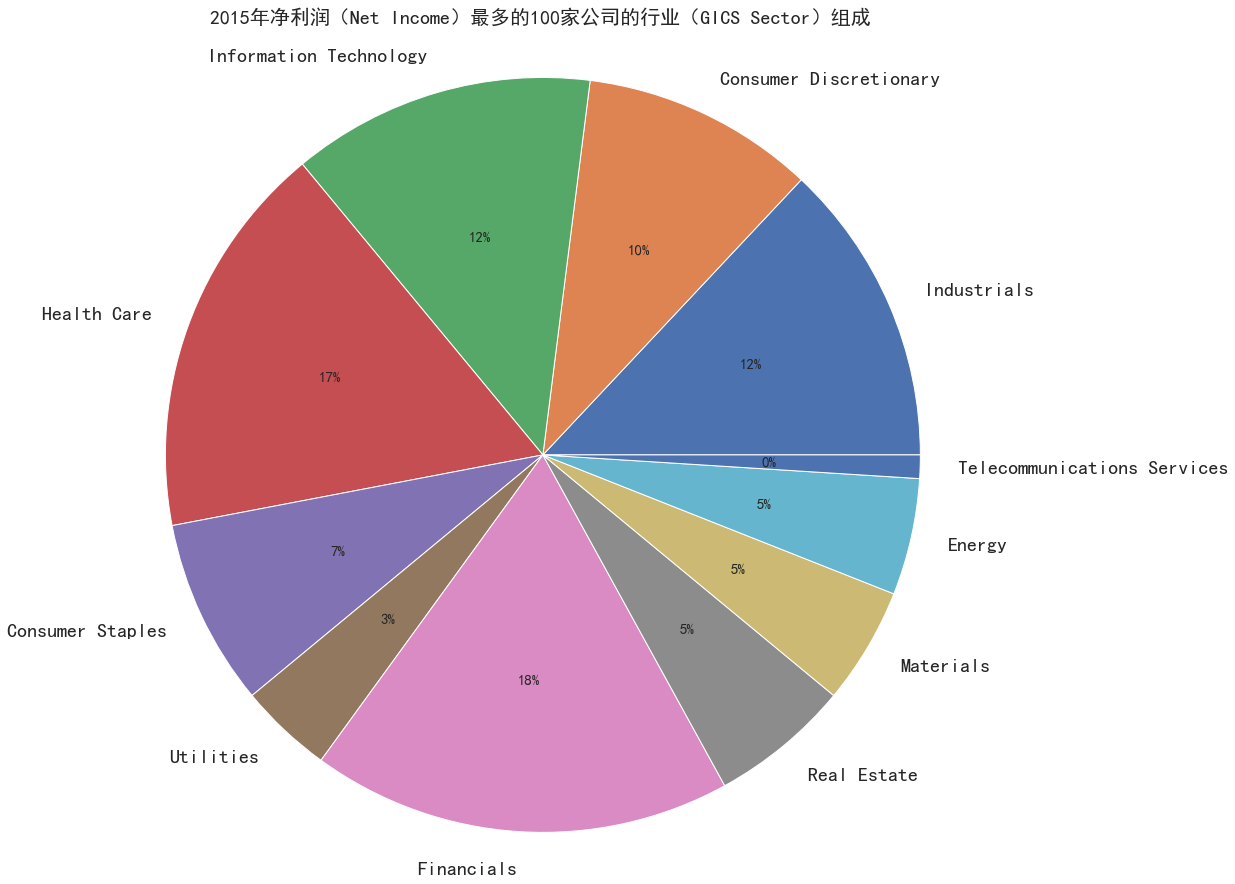

In [5]:
df.sort_values(by = 'Net Income')
df1 = df[['Ticker Symbol','Net Income','GICS Sector']]
df1 = df1.head(n = 100)
col=df1.iloc[:,2]
labels=col.values
labels_uni = list(dict.fromkeys(labels))
label_sizes = {}
for i,x in enumerate(labels): #取比例
    if x not in label_sizes.keys():
        label_sizes[x] = 1
    else:
        label_sizes[x] += 1
sizes = []
for k,v in label_sizes.items():
    sizes.append(v)
    
fig1, ax = plt.subplots( figsize=(15, 15))
wedges, texts, autotexts = ax.pie(sizes, labels=labels_uni, autopct = '%1d%%')
plt.setp(texts, size=20)
plt.setp(autotexts, size=15)
ax.set_title("2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成\n",fontsize = 20)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

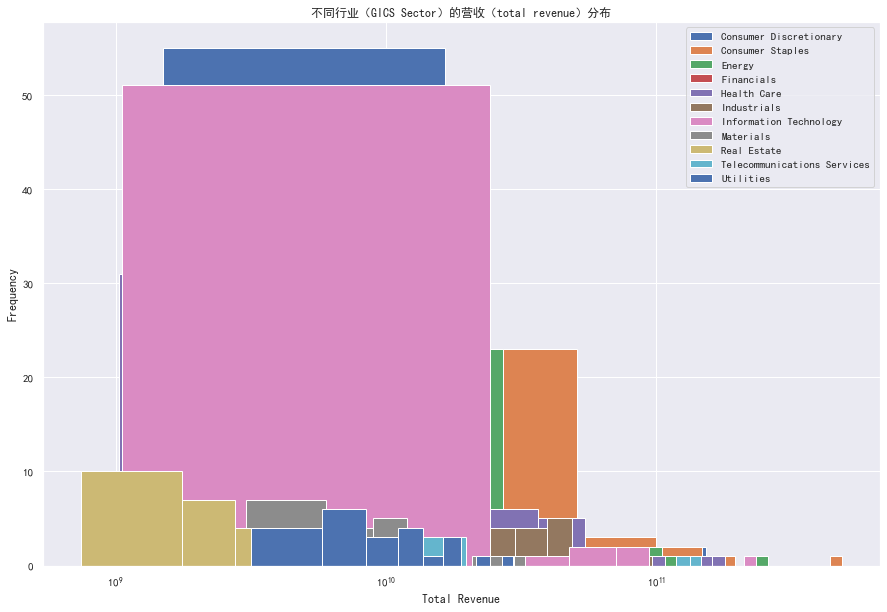

In [36]:
df2 = df
df2 = df2.groupby('GICS Sector')['Total Revenue']
f0 = plt.figure(figsize=(15,10))
df2.plot(kind = 'hist', stacked = True)
plt.gca().set_xscale('log')
plt.legend()
plt.title('不同行业（GICS Sector）的营收（total revenue）分布')
plt.xlabel('Total Revenue')
plt.show() #不是很懂为什么长这样

## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）/营收(Total Revenue)的比例 （40 分）

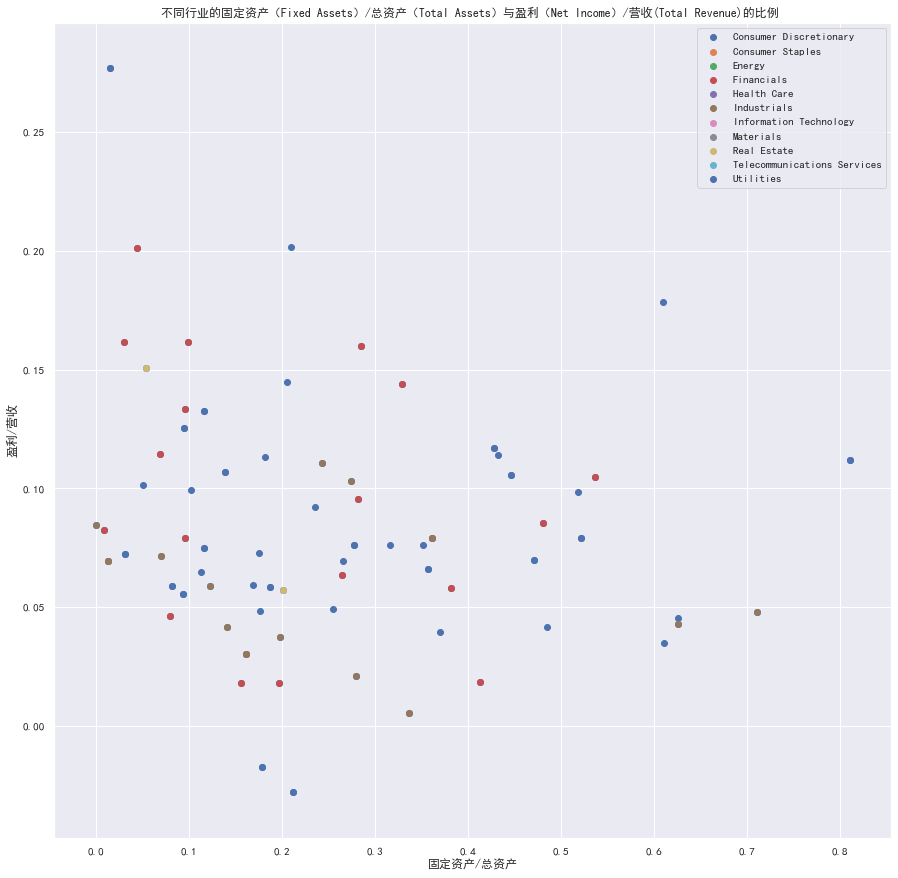

In [37]:
df3 = df.rename(columns={'Fixed Assets':'Fixed_Assets', 'Total Assets':'Total_Assets', 
                         'Net Income':'Net_Income', 'Total Revenue':'Total_Revenue'})

df3['Fixed/Total'] = (df3.Fixed_Assets/df3.Total_Assets)
df3['Net/Total'] = (df3.Net_Income/df3.Total_Revenue)

df3 = df3[['GICS Sector','Fixed/Total','Net/Total']].sort_values('GICS Sector')
FT = list(df3.loc[:,'Fixed/Total'].values)
TT = list(df3.loc[:,'Net/Total'].values)

GICS = {}
for i in range (0,len(df3.index)): #取行业与对应数量
    if df3.iat[i,0] not in GICS.keys():
        GICS[df3.iat[i,0]] = 1
    else:
        GICS[df3.iat[i,0]] += 1
GICS_num = list(GICS.values())
GICS_name = list(GICS.keys())

plt.figure(figsize = (15,15))
for i in range(0,len(GICS_num)): #根据数量画点
    if i == 0:
        x = FT[0:GICS_num[i]]
        y = TT[0:GICS_num[i]]
        plt.scatter(x,y,label=GICS_name[i])
    else:
        x = FT[GICS_num[i-1]:GICS_num[i]]
        y = TT[GICS_num[i-1]:GICS_num[i]]
        plt.scatter(x,y,label=GICS_name[i])
plt.legend()
plt.xlabel('固定资产/总资产')
plt.ylabel('盈利/营收')
plt.title('不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）/营收(Total Revenue)的比例 ')
plt.show()